In [1]:
# Naive bayes is a classification Algorithm

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions 
n=pd.read_csv("pokemon.csv")
n.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [2]:
en_data=n[["Legendary"]]

In [3]:
# changing the boolean-data to interger data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
n["Legendary_new"]=le.fit_transform(en_data)
n.head(2)

C:\Users\tonyf\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Legendary_new
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0


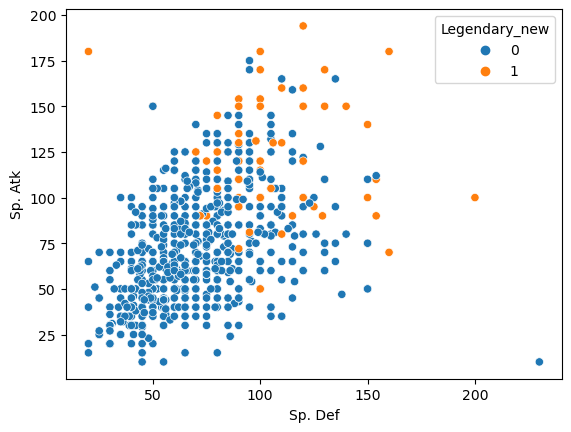

In [4]:
# To check the Linear distribution 
sns.scatterplot(x="Sp. Def",y="Sp. Atk",data=n,hue="Legendary_new")
plt.show()

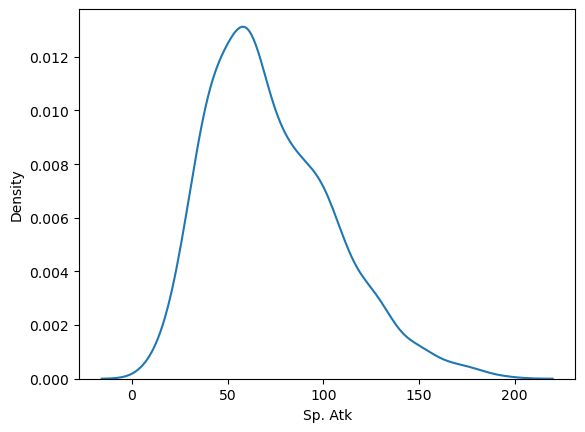

In [5]:
# To Check the Distribution
sns.kdeplot(data=n["Sp. Atk"])
plt.show()

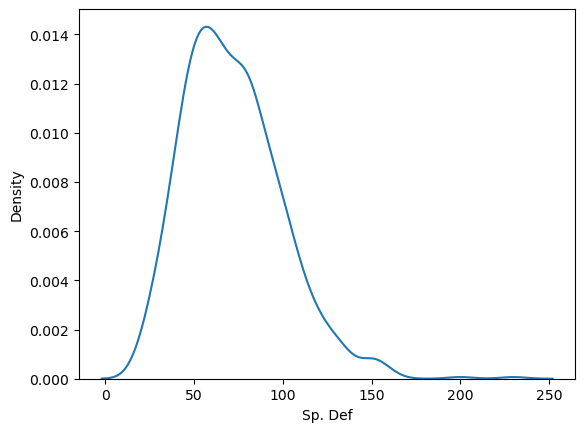

In [6]:
# To Check the Distribution
sns.kdeplot(data=n["Sp. Def"])
plt.show()

In [7]:
x=n.iloc[:,8:10]
y=n["Legendary_new"]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

# GaussianNB

In [9]:
# Suitable for features that are continuous and have a Normal Distibution

from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [10]:
gnb.score(x_train,y_train)*100 , gnb.score(x_test,y_test)*100

(92.34375, 91.875)

In [12]:
gnb.predict([[45,49]])

C:\Users\tonyf\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)

# MultinomialNB

In [ ]:
# Used for Discrete data , such as Text data

mn=MultinomialNB()
mn.fit(x_train,y_train)

In [ ]:
mn.score(x_train,y_train)*100 , mn.score(x_test,y_test)*100

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mn)

# BernoulliNB

In [ ]:
# Assume that features are binary (boolean ) variables
# suitable for data that can br represented as binary feature

be=BernoulliNB()
be.fit(x_train,y_train)

In [ ]:
be.score(x_train,y_train)*100 , be.score(x_test,y_test)*100

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=be)